<a id='TOP'></a>

### Data cleaning
[Exploring](initial_look.ipynb) #look at this. Wonky link but will tweak
### Models
[Train Test Split](#TTS)  
[Decision Tree](#clf_DT)  
[XGB](#XGB)

In [56]:
import pandas as pd
import numpy as np

df = pd.read_csv('BusinessMasterFile.csv')
df.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME,RULEYEAR,LEVEL4,ACT1,ACT2,ACT3
0,19818,PALMER SECOND BAPTIST CHURCH,NaN,1050 THORNDIKE ST,PALMER,MA,01069-1507,3125,3,9,...,NaN,NaN,NaN,NaN,3514,1955,NaN,100,0.0,0.0
1,29215,ST GEORGE CATHEDRAL,NaN,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,2365,3,9,...,NaN,NaN,NaN,NaN,NaN,1972,NaN,100,0.0,0.0
2,587764,IGLESIA BETHESDA INC,NaN,157 ANDOVER ST,LOWELL,MA,01852-2348,0,3,3,...,NaN,NaN,NaN,X21,NaN,2004,X,0,NaN,NaN
3,635913,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,NaN,454 ESSEX ST,LAWRENCE,MA,01840-1242,0,3,3,...,NaN,NaN,NaN,X21,NaN,2004,X,0,NaN,NaN
4,765634,MERCY CHAPEL INTERNATIONAL,NaN,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,0,3,3,...,NaN,NaN,NaN,X20,NaN,2004,X,0,NaN,NaN


In [57]:
import missingno as msno
import matplotlib.pyplot as plt
plt.style.use('ggplot')

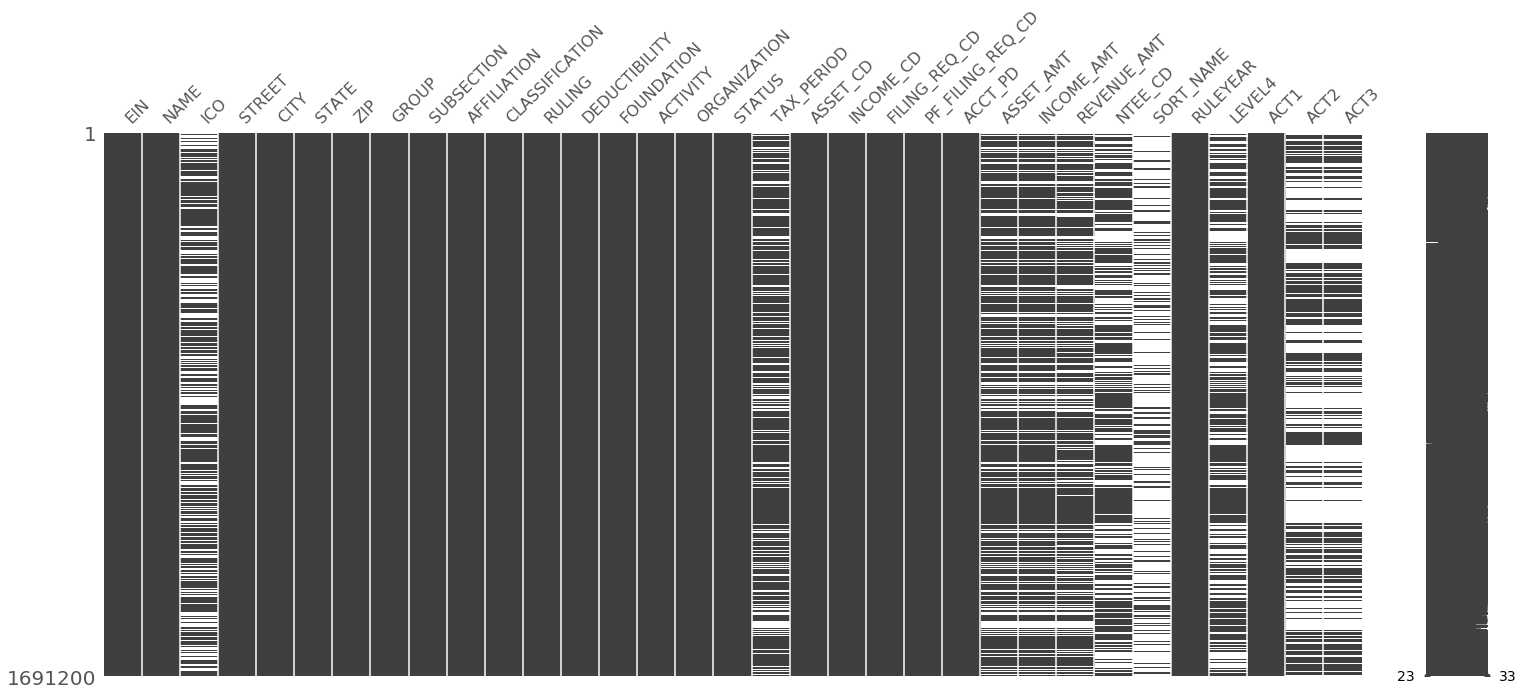

In [58]:
msno.matrix(df)

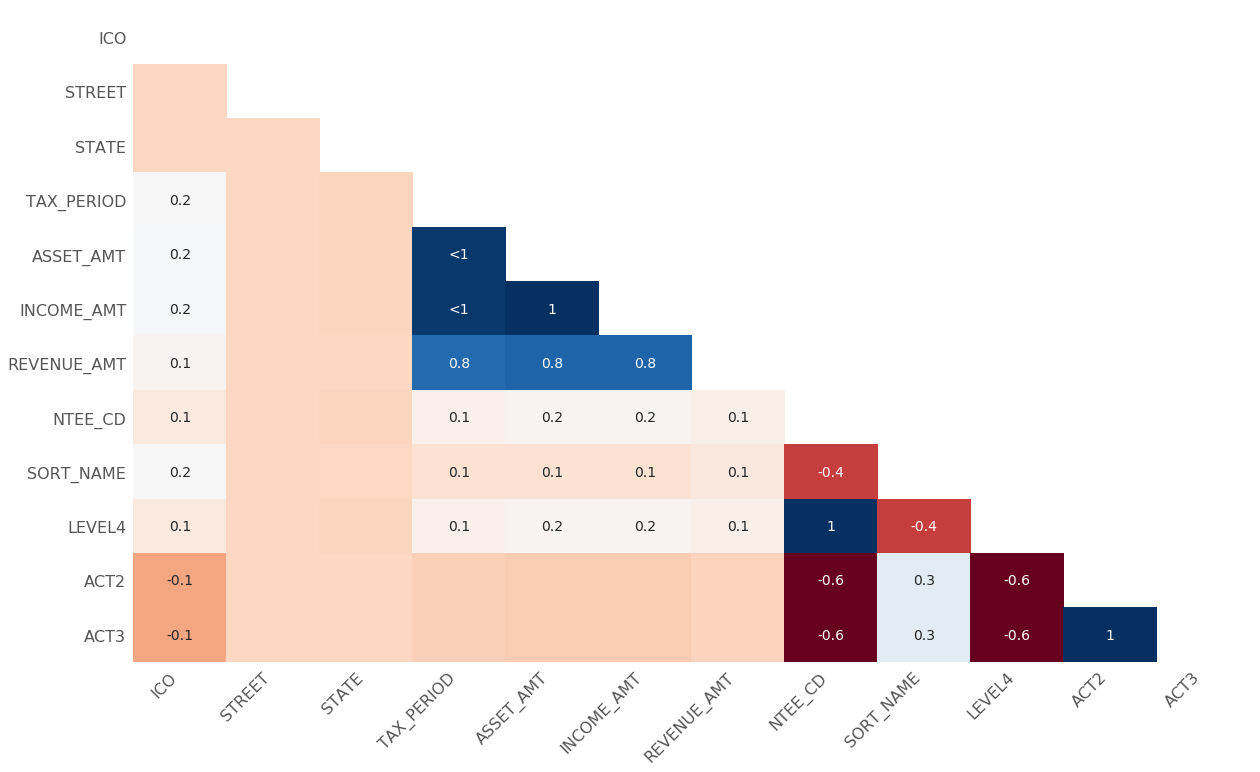

In [59]:
msno.heatmap(df)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691200 entries, 0 to 1691199
Data columns (total 33 columns):
EIN                 int64
NAME                object
ICO                 object
STREET              object
CITY                object
STATE               object
ZIP                 object
GROUP               int64
SUBSECTION          int64
AFFILIATION         int64
CLASSIFICATION      int64
RULING              int64
DEDUCTIBILITY       int64
FOUNDATION          int64
ACTIVITY            int64
ORGANIZATION        int64
STATUS              int64
TAX_PERIOD          float64
ASSET_CD            int64
INCOME_CD           int64
FILING_REQ_CD       int64
PF_FILING_REQ_CD    int64
ACCT_PD             int64
ASSET_AMT           float64
INCOME_AMT          float64
REVENUE_AMT         float64
NTEE_CD             object
SORT_NAME           object
RULEYEAR            int64
LEVEL4              object
ACT1                int64
ACT2                float64
ACT3                float64
dtypes: 

In [61]:
print(df.REVENUE_AMT.value_counts()[:5])
df.REVENUE_AMT.isna().value_counts()

0.0        688791
1000.0        296
500.0         221
5000.0        215
100.0         214
1.0           204
10000.0       185
2000.0        163
3000.0        133
200.0         129
1500.0        122
2500.0        116
2.0           105
6000.0        103
300.0          99
5.0            98
Name: REVENUE_AMT, dtype: int64


False    1212088
True      479112
Name: REVENUE_AMT, dtype: int64

In [62]:
print(df.ASSET_AMT.value_counts()[:5])
print(df.ASSET_AMT.isna().sum())
print(df.ASSET_CD.value_counts()[:5])
print(df.ASSET_CD.isna().sum())

0.0        677902
1.0         15623
100.0         285
1000.0        217
500.0         191
200.0         120
2000.0        108
5000.0        103
10.0          101
50.0           90
300.0          83
1500.0         81
150.0          73
10000.0        69
25.0           69
5.0            67
Name: ASSET_AMT, dtype: int64
368826
0    1032113
4     169004
3     123873
6     101784
1      80491
Name: ASSET_CD, dtype: int64
0


I am trying to decide whether or not to drop ASSEST_CD/ASSET_AMT and INCOME_AMT/INCOME_CD.

ASSET_AMT is continious data, rather than the coded data in ASSET_CD, so I will keep the AMTs reported over the prebinned. I can alter it myself if need be. Also there seems to be some discrepancy in values from the coded and the reported, which makes my decision. 

Tasks:
- Combine `city`, `street`, `state` into lat and longs. Drop `city`, `street`, `state`. This is the location of the headquarters and doesn't mean that the 501c has operations in that state. https://github.com/geopy/geopy
- Change datetime data into correct formats. `TAX_PERIOD`, `RULING_DATE`
- Make things categorical
- Investigate any connection between SORT_NAME and GROUP EXEMPTION NUM and AFFILCATION CODE [Connection?](#task1)
- Check the Ruling year after 1995 and see if any NTEE exisits.


<a id="task1"></a>

Sort Name Line is another name under which the organization does business.  Also used for trade names, chapter names, or local numbers for subordinate organizations of group rulings

Central - This code is used if the organization is a central type organization (no group exemption) of a National, Regional or Geographic grouping of organizations. 2 Intermediate - This code is used if the organization is an intermediate organization (no group exemption) of a National, Regional or Geographic grouping of organizations (such as a state headquarters of a national organization). 3 Independent - This code is used if the organization is an independent organization or an independent auxiliary 
(i.e., not affiliated with a National, Regional, or Geographic grouping of organizations). 6 Central - This code is used if the organization is a parent (group ruling) and is not a church or 501(c)(1) organization. 7 Intermediate - This code is used if the organization is a group exemption intermediate organization of a National, Regional or Geographic grouping of organizations. 8 Central - This code is used if the organization is a parent (group ruling) and is a church or 501(c)(1) organization. 9 Subordinate - This code is used if the organization is a subordinate in a group ruling

In [63]:
df.drop(['ICO', 
         'RULING', 
         'ACT2', 
         'ACT3', 
         'ASSET_CD', 
         'INCOME_CD', 
         'LEVEL4', 
         'TAX_PERIOD'], axis=1, inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691200 entries, 0 to 1691199
Data columns (total 25 columns):
EIN                 int64
NAME                object
STREET              object
CITY                object
STATE               object
ZIP                 object
GROUP               int64
SUBSECTION          int64
AFFILIATION         int64
CLASSIFICATION      int64
DEDUCTIBILITY       int64
FOUNDATION          int64
ACTIVITY            int64
ORGANIZATION        int64
STATUS              int64
FILING_REQ_CD       int64
PF_FILING_REQ_CD    int64
ACCT_PD             int64
ASSET_AMT           float64
INCOME_AMT          float64
REVENUE_AMT         float64
NTEE_CD             object
SORT_NAME           object
RULEYEAR            int64
ACT1                int64
dtypes: float64(3), int64(15), object(7)
memory usage: 322.6+ MB


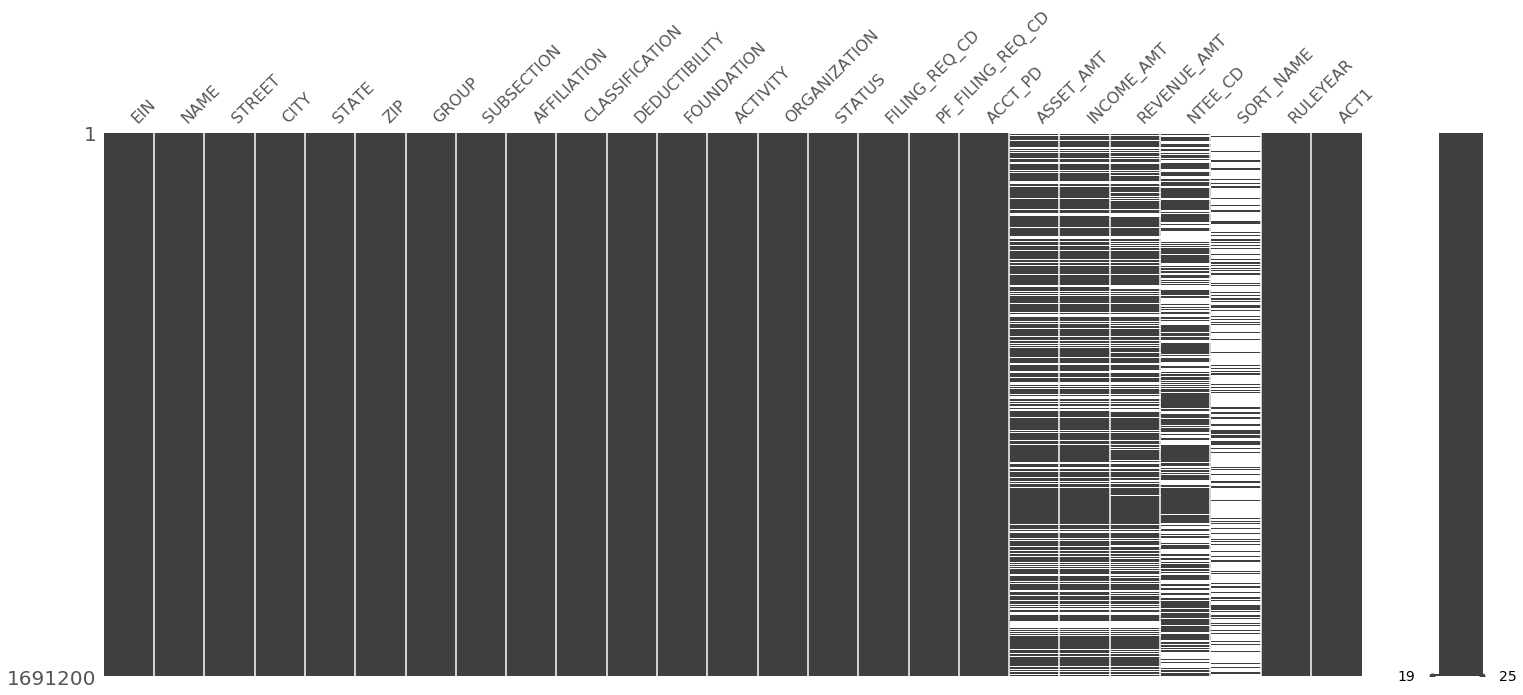

In [65]:
msno.matrix(df)

There is a clear pattern of missing values from `ASSET_AMT`,`INCOME_AMT`, and `REVENUE_AMT`. I will drop values from one column, extending down the rows and then will recheck the patterns.

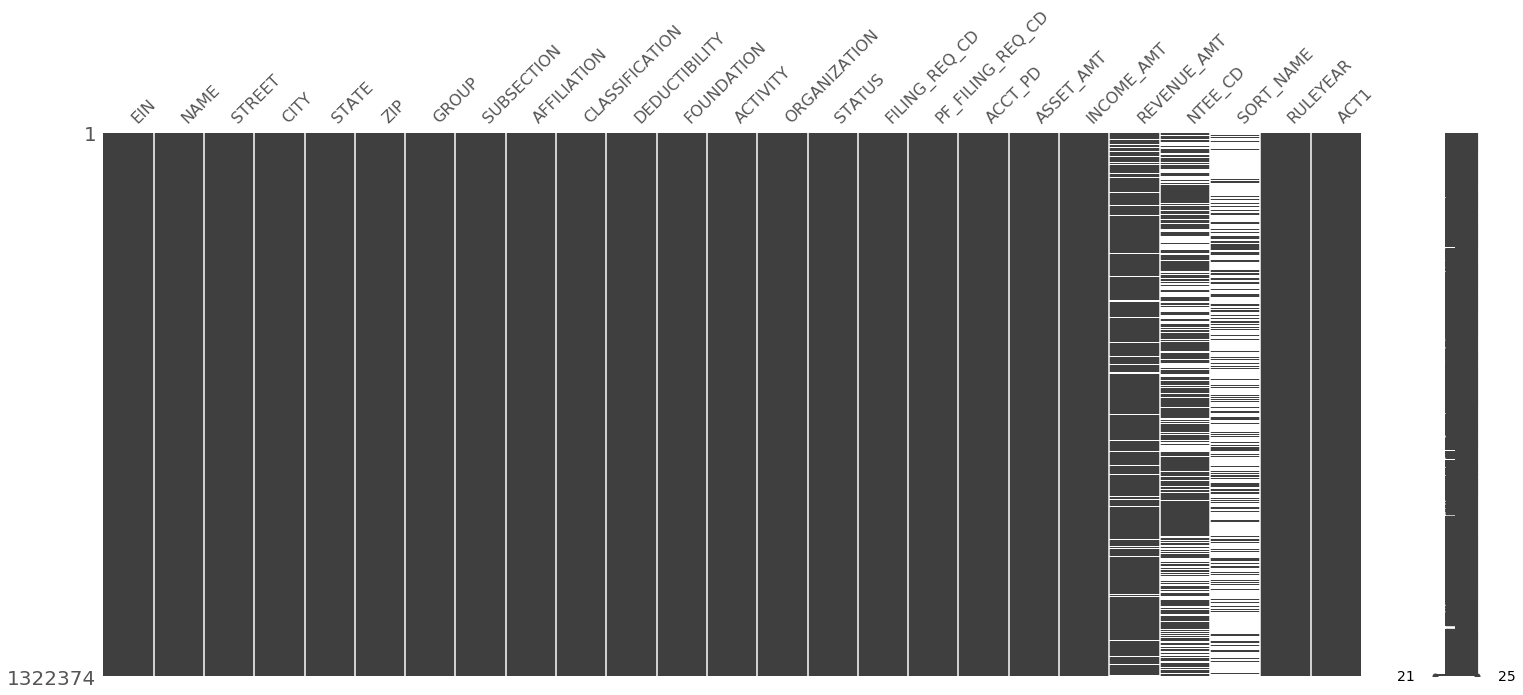

In [66]:
df = df.dropna(subset=['ASSET_AMT'])
msno.matrix(df)

~370,000 entries were removed. 

In [67]:
df.isna().sum()

EIN                      0
NAME                     0
STREET                   2
CITY                     0
STATE                 1062
ZIP                      0
GROUP                    0
SUBSECTION               0
AFFILIATION              0
CLASSIFICATION           0
DEDUCTIBILITY            0
FOUNDATION               0
ACTIVITY                 0
ORGANIZATION             0
STATUS                   0
FILING_REQ_CD            0
PF_FILING_REQ_CD         0
ACCT_PD                  0
ASSET_AMT                0
INCOME_AMT               0
REVENUE_AMT         110286
NTEE_CD             451552
SORT_NAME           965875
RULEYEAR                 0
ACT1                     0
dtype: int64

The last 100K from `REVENUE_AMT` will be dropped as well. I will combine the `SORT_NAME` column with the `NAME` column since they both come from the same field, just a different line. `NTEE_CD` will be addressed seperately as well.

In [68]:
df = df.dropna(subset=['REVENUE_AMT'])

In [69]:
df.isna().sum()

EIN                      0
NAME                     0
STREET                   2
CITY                     0
STATE                  940
ZIP                      0
GROUP                    0
SUBSECTION               0
AFFILIATION              0
CLASSIFICATION           0
DEDUCTIBILITY            0
FOUNDATION               0
ACTIVITY                 0
ORGANIZATION             0
STATUS                   0
FILING_REQ_CD            0
PF_FILING_REQ_CD         0
ACCT_PD                  0
ASSET_AMT                0
INCOME_AMT               0
REVENUE_AMT              0
NTEE_CD             415581
SORT_NAME           868547
RULEYEAR                 0
ACT1                     0
dtype: int64

In [70]:
df.SORT_NAME = df.SORT_NAME.fillna(value = '') #Replaces np.NaN values with something else, string + np.NaN = np.NaN
df['NAME_FULL'] = df.NAME + ' ' + df.SORT_NAME #New column
df.drop(['NAME', 'SORT_NAME'], axis=1, inplace=True) #Getting rid of the old
df.head()

,EIN,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,CLASSIFICATION,DEDUCTIBILITY,...,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,RULEYEAR,ACT1,NAME_FULL
12,10002847,PO BOX 126,HULLS COVE,ME,04644-0126,0,3,3,1000,1,...,2,0,12,0.0,0.0,0.0,A80,2000,0,HULLS COVE NEIGHBORHOOD ASSOCIATION
13,10011694,30 SAMUEL PRESCOTT DR,STOW,MA,01775-1167,0,3,3,1000,1,...,2,0,12,0.0,0.0,0.0,S19,2015,995,MASSACHUSETTS MODERATORS ASSOCIATION
14,10015091,PO BOX 13,CEDAR KNOLLS,NJ,07927-0013,0,3,3,1000,1,...,1,0,12,62462.0,140685.0,140685.0,N64,2012,0,HANOVER SOCCER CLUB INC
15,10017496,PO BOX 534,YORK HARBOR,ME,03911-0534,0,3,3,2000,1,...,1,0,12,233819.0,180773.0,127013.0,NaN,1993,149,AGAMENTICUS YACHT CLUB OF YORK
16,10018555,81 COLLEGE AVE,ORONO,ME,04473-4210,287,7,9,1000,2,...,2,0,12,0.0,0.0,0.0,NaN,1941,360,ALPHA TAU OMEGA FRATERNITY BETA UPSILION MAINE...


In [71]:
df.isna().sum()

EIN                      0
STREET                   2
CITY                     0
STATE                  940
ZIP                      0
GROUP                    0
SUBSECTION               0
AFFILIATION              0
CLASSIFICATION           0
DEDUCTIBILITY            0
FOUNDATION               0
ACTIVITY                 0
ORGANIZATION             0
STATUS                   0
FILING_REQ_CD            0
PF_FILING_REQ_CD         0
ACCT_PD                  0
ASSET_AMT                0
INCOME_AMT               0
REVENUE_AMT              0
NTEE_CD             415581
RULEYEAR                 0
ACT1                     0
NAME_FULL                0
dtype: int64

My target is going to `ACTIVITY`/`NTEE_CD`. The values in `ACTIVITY` are 9 characters long, each set of three indicating what kind of the organization it is There are some that needed more than one set of three to define their organization, others only have one. Planning to use only the first activity code. Also I have to keep in mind, there are ones that could apply to different targets. As expected, the data itself is not that clean. Effort will be made to tidy it up.

The NTEE_CD code was introduced to replace the three digit code after **(CHECK if not 1994/1996)** tax year 1995. I will make my own mapping from the old system to the new system.  

I will run three models; a pre-1995 target, post-1995 target, and the entire dataset with a semi-converted target. The mapping that I create will is an area of potential error. This is a place of further improvement on future iterations of this project. 

Lets now grab some quick masks on the smaller subsets to be used later.

In [72]:
df_post = df
post_index = df_post.NTEE_CD.notna() #mask for all the non-profits with the new coding

post_index

12          True
13          True
14          True
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
30          True
32         False
33         False
34         False
35         False
36         False
37         False
38          True
39         False
40         False
41         False
42         False
           ...  
1691126    False
1691129    False
1691131     True
1691139     True
1691144     True
1691145    False
1691147     True
1691150    False
1691151     True
1691153    False
1691154    False
1691155     True
1691156     True
1691157    False
1691166     True
1691168    False
1691169    False
1691171    False
1691173     True
1691174    False
1691175    False
1691177     True
1691179     True
1691184     True
1691185     True
1691187     True
1691188     True
1691191     Tr

In [73]:
print(df.RULEYEAR[post_index].value_counts()[:5])

2014    86175
2015    60644
2016    59442
2017    52583
2013    35706
Name: RULEYEAR, dtype: int64


Looks good. **ASK JEFF ABOUT THIS**

In [74]:
df.loc[(df.NTEE_CD.notna()) & (df.ACTIVITY == 0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604936 entries, 12 to 1691194
Data columns (total 24 columns):
EIN                 604936 non-null int64
STREET              604936 non-null object
CITY                604936 non-null object
STATE               604403 non-null object
ZIP                 604936 non-null object
GROUP               604936 non-null int64
SUBSECTION          604936 non-null int64
AFFILIATION         604936 non-null int64
CLASSIFICATION      604936 non-null int64
DEDUCTIBILITY       604936 non-null int64
FOUNDATION          604936 non-null int64
ACTIVITY            604936 non-null int64
ORGANIZATION        604936 non-null int64
STATUS              604936 non-null int64
FILING_REQ_CD       604936 non-null int64
PF_FILING_REQ_CD    604936 non-null int64
ACCT_PD             604936 non-null int64
ASSET_AMT           604936 non-null float64
INCOME_AMT          604936 non-null float64
REVENUE_AMT         604936 non-null float64
NTEE_CD             604936 non-null o

In [75]:
df.NTEE_CD.notna().sum()

796507

In [76]:
df.NTEE_CD.isna().sum()

415581

In [77]:
df.ACTIVITY.value_counts()[:10]

0            648115
59000000      12946
907908000     11636
59035000      11596
205000000     10981
36000000      10129
263264279      9497
200000000      9436
319000000      8836
59319000       8748
Name: ACTIVITY, dtype: int64

There is something wrong with the above `.value_counts()`. The Activity Codes provided by the IRS have leading zeroes. Since there wasn't an attempt to control for it them when orginally reading the files, I want further to investigate if the `ACTIVITY` lines contain 9 characters. If they don't, I will adjust them accordingly.

In [78]:
temp = df.ACTIVITY

In [79]:
length = []
for x in temp:
    length.append(len(str(x)))
pd.Series(length).value_counts()

1    648115
9    389701
8    163953
7     10319
dtype: int64

As expected, adjustments are need. Make a small function that will adjust the `ACTIVITY` input to match the 9 character length expected.

In [80]:
def adj_len(num):
    string = str(num)
    
    if len(string) >= 7:
        
        if len(string) == 9:
            return int(string[0:3])
        if len(string) == 8:
            return int(string[0:2])
        if len(string) == 7:
            return int(string[0:1])
    else:
        return num
    

In [81]:
adj_len(123456789)

123

Tester set for a encoding that I will do.

In [82]:
small = df.loc[(df.NTEE_CD.isna()) & (df.ACTIVITY != 0)][:100]

In [83]:
def code_NTEE_V1(y):
    
    x = adj_len(y)
    
    list_a =list(range(60,120))
    list_b =list(range(30,60)) + [540, 914]
    list_c =list(range(350,380)) + [529]
    list_d =[913]
    list_e =list(range(150,180)) + [531] + list(range(541,544))
    list_f = []
    list_g = []
    list_h = []
    list_i =list(range(460,466)) + [406, 526, 527, 528]
    list_j =list(range(120,150)) + list(range(200,230)) + [920]
    list_k =list(range(230,250)) + [916]
    list_l =list(range(380,400)) + [401]
    list_m =[902]
    list_n =list(range(280,320))
    list_o =list(range(320,350))
    list_p =list(range(563,576)) + [917, 918]
    list_q =list(range(510,514)) + [518, 519, 520, 522, 910, 911, 912]
    list_r =list(range(430,450)) + list(range(480,510)) + [261, 405, 481, 482, 534, 535, 924]
    list_s =list(range(408,430)) + [404, 524, 533, 903, 919, 921]
    list_t =list(range(600,604)) + list(range(560,563))
    list_u =list(range(180,200)) 
    list_v = []
    list_w =list(range(250,253)) + list(range(536,540)) + list(range(905,909)) + [262, 263, 400, 402, 403, 407, 514, 515, 516, 521, 523, 525, 530 , 532, 559, 915]
    list_x =list(range(1,30)) + [517]
    list_y =list(range(264,280)) + [253, 254, 259, 260, 900, 901, 922]
    list_z = []

    if x in list_a:
        return 'A'
    if x in list_b:
        return 'B'
    if x in list_c:
        return 'C'
    if x in list_d:
        return 'D'
    if x in list_e:
        return 'E'
    if x in list_f:
        return 'F'
    if x in list_g:
        return 'G'
    if x in list_h:
        return 'H'
    if x in list_i:
        return 'I'
    if x in list_j:
        return 'J'
    if x in list_k:
        return 'K'
    if x in list_l:
        return 'L' 
    if x in list_m:
        return 'M'
    if x in list_n:
        return 'N'
    if x in list_o:
        return 'O'
    if x in list_p:
        return 'P'
    if x in list_q:
        return 'Q'
    if x in list_r:
        return 'R'
    if x in list_s:
        return 'S'
    if x in list_t:
        return 'T'
    if x in list_u:
        return 'U'
    if x in list_v:
        return 'V'
    if x in list_w:
        return 'W'
    if x in list_x:
        return 'X'
    if x in list_y:
        return 'Y'
    if x in list_z:
        return 'Z'
    else:
        trouble.append(x)
        
    

In [84]:
print(code_NTEE_V1(205000000))

J


Test something with a leading zero, or an `ACTIVITY` that does not have 9 characters 

In [85]:
trouble = [] #Within my small data set, any codes that don't have a new label
small.ACT1.apply(code_NTEE_V1)
print(set(trouble))
print(len(trouble))

{640, 612, 613, 652, 593, 599}
6


With the quick check, there are codes that were not coded. This was to be expected. Within the set above, none of these are defined by the IRS. I suspect this set to grown once applied to the larger dataset.  

Within the process, I will update the master list with proper categorizations through out. The mapping will be adjusted accordingly. Please see the documentation if further review is [desired](./irs_jan_2010.pdf) 

In [86]:
small.NTEE_CD = small.ACT1.apply(code_NTEE_V1)
small.NTEE_CD.isna().sum()

6

When updating the new column, columns that don't have a mapping will be updated to be a `None` value that will be later removed.

Lets take care of the subset of rows that can not have any targets for.

In [87]:
df.NTEE_CD.isna().sum()

415581

In [88]:
print(df[(df.NTEE_CD.isna()) & (df.ACT1 == 0)].shape)
df[(df.NTEE_CD.isna()) & (df.ACT1 == 0)].head()

(43179, 24)


,EIN,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,CLASSIFICATION,DEDUCTIBILITY,...,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,RULEYEAR,ACT1,NAME_FULL
32,10027415,1 TUFTS RD,BELFAST,ME,04915-7513,275,8,9,1000,0,...,2,0,3,0.0,0.0,0.0,NaN,0,0,ANCIENT FREE & ACCEPTED MASONS OF MAINE 24 BEL...
49,10055140,10 LITCHFIELD RD,HALLOWELL,ME,04347-1109,0,13,3,1000,0,...,1,0,6,546481.0,51568.0,36162.0,NaN,1976,0,HALLOWELL CENTENNIAL BURIAL GROUND ASSN INC
78,10114110,150 CAPITOL ST STE 5,AUGUSTA,ME,04330-6858,0,6,0,1000,0,...,1,0,9,142899.0,431279.0,431279.0,NaN,0,0,MAINE WATER UTILITIES ASSOCIATION
300,10216657,952 MAIN ST,SANFORD,ME,04073-3509,0,3,3,1200,1,...,1,0,6,1927624.0,624695.0,538612.0,NaN,1987,0,SANFORD LIBRARY ASSOCIATION LOUIS B GOODALL ME...
331,10220348,PO BOX 422,FARMINGTON,ME,04938-0422,5930,3,9,2000,1,...,2,0,6,0.0,0.0,0.0,NaN,2013,0,UNIVERSITY OF MAINE SYSTEM INC FRANKLIN COUNTY...


In [89]:
before = df.shape

mask = df.index[(df.NTEE_CD.isna()) & (df.ACT1 == 0)] #index numbers to drop
df = df.drop(mask)

after = df.shape

print(f'From {before} rows, down to {after} rows')

From (1212088, 24) rows, down to (1168909, 24) rows


In [90]:
trouble = [] #the code_NTEE(X) function has a list to check the missing variables
look = df.ACTIVITY.apply(code_NTEE_V1)
set(trouble)

{0,
 451,
 556,
 578,
 605,
 607,
 610,
 630,
 632,
 650,
 651,
 659,
 681,
 700,
 705,
 713,
 720,
 740,
 750,
 760,
 787,
 801,
 850,
 860,
 899,
 904,
 909,
 923,
 925,
 926,
 927,
 928,
 930,
 931,
 933,
 967,
 990,
 993,
 994,
 995,
 998,
 999}

At this point, I manually went back and updated my `code_NTEE` function. I updated lists and created a new list for undefined codes. Also, there were a few ambigious codings that I have decided to drop altogeter. These includes definitions such as "Indians (tribes, cultures, etc.)" , "Government instrumentality or agency", and "947(a)(2) trust". Further man hours are required to shift through the material to categorize them correctly.  

Using the updated `code_NTEE` function below, I will move forward with the data cleaning process. https://nccs.urban.org/publication/irs-activity-codes

In [91]:
def code_NTEE_V2(y):
    
    x = adj_len(y)
    
    list_a =list(range(60,120))
    list_b =list(range(30,60)) + [540, 914]
    list_c =list(range(350,380)) + [529]
    list_d =[913]
    list_e =list(range(150,180)) + [531] + list(range(541,544))
    list_f = []
    list_g = []
    list_h = []
    list_i =list(range(460,466)) + [406, 526, 527, 528]
    list_j =list(range(120,150)) + list(range(200,230)) + [920]
    list_k =list(range(230,250)) + [916]
    list_l =list(range(380,400)) + [401]
    list_m =[902]
    list_n =list(range(280,320))
    list_o =list(range(320,350))
    list_p =list(range(563,576)) + [917, 918]
    list_q =list(range(510,514)) + [518, 519, 520, 522, 910, 911, 912]
    list_r =list(range(430,450)) + list(range(480,510)) + [261, 405, 481, 482, 534, 535, 924]
    list_s =list(range(408,430)) + [404, 524, 533, 903, 919, 921]
    list_t =list(range(600,604)) + list(range(560,563))
    list_u =list(range(180,200)) 
    list_v = []
    list_w =list(range(250,253)) + list(range(536,540)) + list(range(905,909)) + [262, 263, 400, 402, 403, 407, 514, 515, 516, 521, 523, 525, 530 , 532, 559, 915]
    list_x =list(range(1,30)) + [517]
    list_y =list(range(264,280)) + [253, 254, 259, 260, 900, 901, 922]
    list_z = []
    
    too_vague = [904, 909, 923] + list(range(925,999))
    not_defined = [256, 257, 466,469, 470, 556, 557, 999] + list(range(450,460)) + list(range(484, 509)) + list(range(576, 600)) + list(range(603,900)) + too_vague

    if x == 0:
        return None
    if x in list_a:
        return 'A'
    if x in list_b:
        return 'B'
    if x in list_c:
        return 'C'
    if x in list_d:
        return 'D'
    if x in list_e:
        return 'E'
    if x in list_f:
        return 'F'
    if x in list_g:
        return 'G'
    if x in list_h:
        return 'H'
    if x in list_i:
        return 'I'
    if x in list_j:
        return 'J'
    if x in list_k:
        return 'K'
    if x in list_l:
        return 'L' 
    if x in list_m:
        return 'M'
    if x in list_n:
        return 'N'
    if x in list_o:
        return 'O'
    if x in list_p:
        return 'P'
    if x in list_q:
        return 'Q'
    if x in list_r:
        return 'R'
    if x in list_s:
        return 'S'
    if x in list_t:
        return 'T'
    if x in list_u:
        return 'U'
    if x in list_v:
        return 'V'
    if x in list_w:
        return 'W'
    if x in list_x:
        return 'X'
    if x in list_y:
        return 'Y'
    if x in list_z:
        return 'Z'
    if x in not_defined:
        return None
    else:
        trouble.append(x)
        
    

In [92]:
trouble = [] #the code_NTEE(X) function has a list to check the missing variables
look = df.ACTIVITY.apply(code_NTEE_V2)
trouble

[]

There were no trouble codes anymore. We will merge the changes and tidy up the last few things wrong with the data.
Keep in mind that this step heavily effects the target outcome in the joint dataset.

In [93]:
df.NTEE_CD.isna().sum()

372402

In [94]:
df.NTEE_CD.fillna(df.ACTIVITY.apply(code_NTEE_V2), inplace=True)

In [95]:
print(df.NTEE_CD.isna().sum())
df[df.NTEE_CD.isna()].head()

11515


,EIN,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,CLASSIFICATION,DEDUCTIBILITY,...,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,RULEYEAR,ACT1,NAME_FULL
150,10192722,109 MAIN ST,HOULTON,ME,04730-2123,0,6,3,3000,2,...,1,0,12,27756.0,167351.0,83314.0,None,1946,927,HOULTON CHAMBER OF COMMERCE
235,10211564,PO BOX 888,LEWISTON,ME,04243-0888,0,3,3,1000,1,...,1,0,12,2638982.0,1287903.0,1270323.0,None,1961,927,UNITED WAY OF ANDROSCOGGIN COUNTY INC
411,10241354,10 BRIDGE ST,RUMFORD,ME,04276-2007,0,6,3,3000,2,...,1,0,6,23675.0,60997.0,42828.0,None,1944,999,RIVER VALLEY CHAMBER OF COMMERCE
547,10279581,123 MEDICAL CENTER DR,BRUNSWICK,ME,04011-2652,0,3,3,1000,1,...,1,0,6,164903.0,104651.0,104651.0,None,1973,999,MIDCOAST HOSPITAL-BRUNSWICK AUXILIARY
637,10315181,PO BOX 192,PHILLIPS,ME,04966-0192,0,3,3,1000,1,...,2,0,12,0.0,0.0,0.0,None,1972,999,SANDY RIVER AMBULANCE ASSOCIATION


Finally dropping the remaining ~11K rows that don't have a clear NTEE code.

In [96]:
df = df.dropna(subset=['NTEE_CD'])
df.shape

(1157394, 24)

In [97]:
df.isna().sum()

EIN                   0
STREET                1
CITY                  0
STATE               894
ZIP                   0
GROUP                 0
SUBSECTION            0
AFFILIATION           0
CLASSIFICATION        0
DEDUCTIBILITY         0
FOUNDATION            0
ACTIVITY              0
ORGANIZATION          0
STATUS                0
FILING_REQ_CD         0
PF_FILING_REQ_CD      0
ACCT_PD               0
ASSET_AMT             0
INCOME_AMT            0
REVENUE_AMT           0
NTEE_CD               0
RULEYEAR              0
ACT1                  0
NAME_FULL             0
dtype: int64

Now to drop the very small subset of missing values.

In [98]:
df.dropna(subset=['STATE', 'STREET'], inplace=True) #dropping the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156499 entries, 12 to 1691185
Data columns (total 24 columns):
EIN                 1156499 non-null int64
STREET              1156499 non-null object
CITY                1156499 non-null object
STATE               1156499 non-null object
ZIP                 1156499 non-null object
GROUP               1156499 non-null int64
SUBSECTION          1156499 non-null int64
AFFILIATION         1156499 non-null int64
CLASSIFICATION      1156499 non-null int64
DEDUCTIBILITY       1156499 non-null int64
FOUNDATION          1156499 non-null int64
ACTIVITY            1156499 non-null int64
ORGANIZATION        1156499 non-null int64
STATUS              1156499 non-null int64
FILING_REQ_CD       1156499 non-null int64
PF_FILING_REQ_CD    1156499 non-null int64
ACCT_PD             1156499 non-null int64
ASSET_AMT           1156499 non-null float64
INCOME_AMT          1156499 non-null float64
REVENUE_AMT         1156499 non-null float64
NTEE_CD         

Now removing the other columns that I won't be using to model my data with

In [99]:
df = df.drop(['NAME_FULL', 'STREET', 'ZIP', 'CITY','ACTIVITY', 'EIN', 'ACT1', 'ACCT_PD'], axis=1)

Now taking a look at `NTEE_CD` column and getting the proper format.

In [100]:
df.NTEE_CD.head()

12    A80
13    S19
14    N64
15      J
16      B
Name: NTEE_CD, dtype: object

Lets take this opportunity to split off a subsection of this data set that was already coded in preparation for running in a model.

In [101]:
df_post = df[df.NTEE_CD.apply(lambda x: len(str(x)) > 2)]
df_post.shape

(795612, 16)

___
___
LAST CHANCE TO PULL APART
___
___

Lets remove the more specific coding form the `NTEE` column, just leaving the one of the 26 categories.

In [102]:
df.NTEE_CD = df.NTEE_CD.apply(lambda x: x[0:1])
df_post.NTEE_CD = df.NTEE_CD.apply(lambda x: x[0:1])

df.NTEE_CD.head(), df_post.NTEE_CD.head()

/home/socjon/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(12    A
 13    S
 14    N
 15    J
 16    B
 Name: NTEE_CD, dtype: object, 12    A
 13    S
 14    N
 30    A
 38    Y
 Name: NTEE_CD, dtype: object)

In [103]:
df.NTEE_CD.value_counts()

B    228078
N    102704
P    100822
A     99446
W     72609
X     63003
S     55222
J     54231
O     48263
E     45385
Y     43364
T     43305
L     27953
Q     27803
D     26392
C     23296
M     15831
K     14397
F     13610
I     11406
R     11071
G     10800
Z      7256
H      4564
U      4374
V      1298
0        12
c         3
8         1
Name: NTEE_CD, dtype: int64

In [104]:
df.NTEE_CD.value_counts(normalize=True)

B    1.972142e-01
N    8.880596e-02
P    8.717863e-02
A    8.598883e-02
W    6.278345e-02
X    5.447735e-02
S    4.774928e-02
J    4.689239e-02
O    4.173199e-02
E    3.924344e-02
Y    3.749593e-02
T    3.744491e-02
L    2.417036e-02
Q    2.404066e-02
D    2.282060e-02
C    2.014355e-02
M    1.368873e-02
K    1.244878e-02
F    1.176828e-02
I    9.862525e-03
R    9.572857e-03
G    9.338529e-03
Z    6.274108e-03
H    3.946393e-03
U    3.782104e-03
V    1.122353e-03
0    1.037614e-05
c    2.594036e-06
8    8.646787e-07
Name: NTEE_CD, dtype: float64

My classes are imbalanced. I forgot to review my target variables to ensure they were correct. BUT I got ~20% accuracy, which makes sense since that is my biggest class. This is a baseline, even a very rough one. There were a few classes where most everything ended up, which is intriguing within itself.

In [105]:
removal = ['c', '0', '8'] #Setting what we don't want

mask = df[df.NTEE_CD.isin(removal)] #Finding the rows that contain those values and masking a mask
df = df.drop(mask.index) #Dropping based on index

mask_post = df_post[df_post.NTEE_CD.isin(removal)] #Finding the rows that contain those values and masking a mask
df_post = df_post.drop(mask.index)


df.shape, df_post.shape

((1156483, 16), (795596, 16))

In [106]:
df.NTEE_CD.value_counts()

B    228078
N    102704
P    100822
A     99446
W     72609
X     63003
S     55222
J     54231
O     48263
E     45385
Y     43364
T     43305
L     27953
Q     27803
D     26392
C     23296
M     15831
K     14397
F     13610
I     11406
R     11071
G     10800
Z      7256
H      4564
U      4374
V      1298
Name: NTEE_CD, dtype: int64

Issues running this whole data set has given me some headaches so I am going to take a subsample of this data to alleviate the computational issue.

I am going to group by the `target` variable and then take subsamples of 10,000 of each group. There are four `target` variables that won't be able to completely full given n=10000, without using replacement when taking the samples. If replacement were to be used, there would be a greater chance that our models would over fit on those specific `target`s.  

I will manually remove, and then append,the columns that contain less than 10K rows. Using the [`pd.sample()`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html), it reasonably doesn't allow taking a larger sample than the population size without using replacement.

In [107]:
to_append_df = df[df.NTEE_CD.isin(['Z','H','U','V'])]

df_downsize = df[~df.NTEE_CD.isin(['Z','H','U','V'])] #The tilda is a negation, everything BUT those listed


df_downsize.shape

(1138991, 16)

In [108]:
df_downsize = df_downsize.groupby('NTEE_CD', as_index=False).apply(lambda x: x.sample(10000, random_state=26))

df_downsize = df_downsize.append(to_append_df)

df_downsize.head()

,STATE,GROUP,SUBSECTION,AFFILIATION,CLASSIFICATION,DEDUCTIBILITY,FOUNDATION,ORGANIZATION,STATUS,FILING_REQ_CD,PF_FILING_REQ_CD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,RULEYEAR
"(0, 1686557)",HI,0,3,3,1000,1,15,1,1,1,0,4364983.0,854128.0,827297.0,A,1996
"(0, 937487)",TX,0,3,3,2000,1,16,1,1,2,0,0.0,0.0,0.0,A,1991
"(0, 1086951)",CA,0,3,3,2000,1,15,1,1,1,0,1215885.0,198033.0,192034.0,A,2003
"(0, 34238)",NY,0,3,3,1200,1,15,5,1,2,0,0.0,0.0,0.0,A,2004
"(0, 546195)",MI,9516,3,9,1000,1,16,1,1,2,0,0.0,0.0,0.0,A,1995


In [109]:
df_downsize.shape

(237492, 16)

In [110]:
df_downsize.NTEE_CD.value_counts(normalize=True)

X    0.042107
K    0.042107
F    0.042107
O    0.042107
M    0.042107
Y    0.042107
T    0.042107
L    0.042107
B    0.042107
N    0.042107
J    0.042107
W    0.042107
R    0.042107
I    0.042107
Q    0.042107
S    0.042107
G    0.042107
C    0.042107
D    0.042107
E    0.042107
A    0.042107
P    0.042107
Z    0.030553
H    0.019217
U    0.018417
V    0.005465
Name: NTEE_CD, dtype: float64

Good, these all look like my expected outcomes. Lets check the class balance for the rest of the columns

In [52]:
df.columns

Index(['STATE', 'GROUP', 'SUBSECTION', 'AFFILIATION', 'CLASSIFICATION',
       'DEDUCTIBILITY', 'FOUNDATION', 'ORGANIZATION', 'STATUS',
       'FILING_REQ_CD', 'PF_FILING_REQ_CD', 'ASSET_AMT', 'INCOME_AMT',
       'REVENUE_AMT', 'NTEE_CD', 'RULEYEAR'],
      dtype='object')

In [53]:
top_values = []
for col in df.columns:
    top_values.append(df[col].value_counts(normalize=True)[:5])
top_values

[CA    0.103422
 TX    0.068869
 NY    0.060910
 FL    0.048955
 PA    0.042625
 Name: STATE, dtype: float64, 0       0.775829
 820     0.007404
 188     0.006774
 925     0.006450
 1072    0.005382
 Name: GROUP, dtype: float64, 3    0.731922
 4    0.058842
 6    0.049165
 5    0.035975
 7    0.035699
 Name: SUBSECTION, dtype: float64, 3    0.772424
 9    0.221412
 6    0.002686
 1    0.002476
 2    0.000802
 Name: AFFILIATION, dtype: float64, 1000    0.553375
 2000    0.179146
 1200    0.105085
 3000    0.066522
 7000    0.027562
 Name: CLASSIFICATION, dtype: float64, 1    0.796842
 2    0.197174
 0    0.005880
 4    0.000105
 Name: DEDUCTIBILITY, dtype: float64, 15    0.431278
 0     0.267943
 16    0.247533
 11    0.016504
 17    0.014625
 Name: FOUNDATION, dtype: float64, 1    0.754106
 5    0.230147
 2    0.012890
 0    0.001865
 3    0.000931
 Name: ORGANIZATION, dtype: float64, 1     0.999615
 2     0.000296
 25    0.000059
 12    0.000030
 Name: STATUS, dtype: float64, 2     0.

We can see here that most of our classes aren't balanced throughout the data. While not ideal, we can still use different methods to get around the imbalanced data set. Nevertheless, I will still plan on running a base line model.

In [54]:
df.isna().sum()

STATE               0
GROUP               0
SUBSECTION          0
AFFILIATION         0
CLASSIFICATION      0
DEDUCTIBILITY       0
FOUNDATION          0
ORGANIZATION        0
STATUS              0
FILING_REQ_CD       0
PF_FILING_REQ_CD    0
ASSET_AMT           0
INCOME_AMT          0
REVENUE_AMT         0
NTEE_CD             0
RULEYEAR            0
dtype: int64

In [55]:
target_post = pd.DataFrame(df_post.NTEE_CD)
data_post = df_post.drop(['NTEE_CD'], axis=1)

In [56]:
data_post.isna().sum()

STATE               0
GROUP               0
SUBSECTION          0
AFFILIATION         0
CLASSIFICATION      0
DEDUCTIBILITY       0
FOUNDATION          0
ORGANIZATION        0
STATUS              0
FILING_REQ_CD       0
PF_FILING_REQ_CD    0
ASSET_AMT           0
INCOME_AMT          0
REVENUE_AMT         0
RULEYEAR            0
dtype: int64

In [113]:
target_full = pd.DataFrame(df_downsize.NTEE_CD)
data_full = df_downsize.drop(['NTEE_CD'], axis=1)

In [58]:
data_full.info(), target_full.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156483 entries, 12 to 1691185
Data columns (total 15 columns):
STATE               1156483 non-null object
GROUP               1156483 non-null int64
SUBSECTION          1156483 non-null int64
AFFILIATION         1156483 non-null int64
CLASSIFICATION      1156483 non-null int64
DEDUCTIBILITY       1156483 non-null int64
FOUNDATION          1156483 non-null int64
ORGANIZATION        1156483 non-null int64
STATUS              1156483 non-null int64
FILING_REQ_CD       1156483 non-null int64
PF_FILING_REQ_CD    1156483 non-null int64
ASSET_AMT           1156483 non-null float64
INCOME_AMT          1156483 non-null float64
REVENUE_AMT         1156483 non-null float64
RULEYEAR            1156483 non-null int64
dtypes: float64(3), int64(11), object(1)
memory usage: 141.2+ MB


(None,    NTEE_CD
 12       A
 13       S
 14       N
 15       J
 16       B)

In [59]:
data_full.shape

(1156483, 15)

Training sets <a id='TTS'></a>  
[TOP](#TOP)

In [60]:
df_dum_post = pd.get_dummies(data_post, columns=['STATE', 'GROUP', 'SUBSECTION', 'AFFILIATION', 
                                       'CLASSIFICATION', 'DEDUCTIBILITY', 'FOUNDATION', 
                                       'ORGANIZATION', 'STATUS', 'FILING_REQ_CD', 
                                       'PF_FILING_REQ_CD'])

In [61]:
from sklearn.model_selection import train_test_split
X_train_post, X_test_post, y_train_post, y_test_post = train_test_split(df_dum_post, target_post, test_size = .2)

In [62]:
X_train_post.to_pickle('X_train_post')
X_test_post.to_pickle('X_test_post')
y_train_post.to_pickle('y_train_post')
y_test_post.to_pickle('y_test_post')

In [ ]:
X_train_post.info()

___

In [114]:
df_dum_full = pd.get_dummies(df_downsize, columns=['STATE', 'GROUP', 'SUBSECTION', 'AFFILIATION', 
                                       'CLASSIFICATION', 'DEDUCTIBILITY', 'FOUNDATION', 
                                       'ORGANIZATION', 'STATUS', 'FILING_REQ_CD', 
                                       'PF_FILING_REQ_CD'])

In [115]:
from sklearn.model_selection import train_test_split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(df_dum_full, target_full, test_size = .2)

In [116]:
X_train_full.to_pickle('X_train_full')
X_test_full.to_pickle('X_test_full')
y_train_full.to_pickle('y_train_full')
y_test_full.to_pickle('y_test_full')

#### Post

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X_train_post = pd.read_pickle('X_train_post')
y_train_post = pd.read_pickle('y_train_post')
X_test_post = pd.read_pickle('X_test_post')
y_test_post = pd.read_pickle('y_test_post')

#### Full

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X_train_full = pd.read_pickle('X_train_full')
y_train_full = pd.read_pickle('y_train_full')
X_test_full = pd.read_pickle('X_test_full')
y_test_full = pd.read_pickle('y_test_full')

In [ ]:
X_train_full.info()

In [ ]:
X_train.shape, y_train.shape

---
## MODELS 

Decision Tree<a id="clf_DT"></a>  
[TOP](#TOP)

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import time
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix

clf_DT = DecisionTreeClassifier(max_features='auto', max_depth=10, min_samples_split=1000)

/home/socjon/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
start_time = time.time()

clf_DT.fit(X_train_post, y_train_post)
print("--- %s seconds ---" % (time.time() - start_time))

--- 88.6001181602478 seconds ---


In [5]:
y_hat_post = clf_DT.predict(X_test_post)

In [6]:
acc = accuracy_score(y_test_post,y_hat_post) * 100
print("Accuracy is :{0}".format(acc))

Accuracy is :23.230266465560582


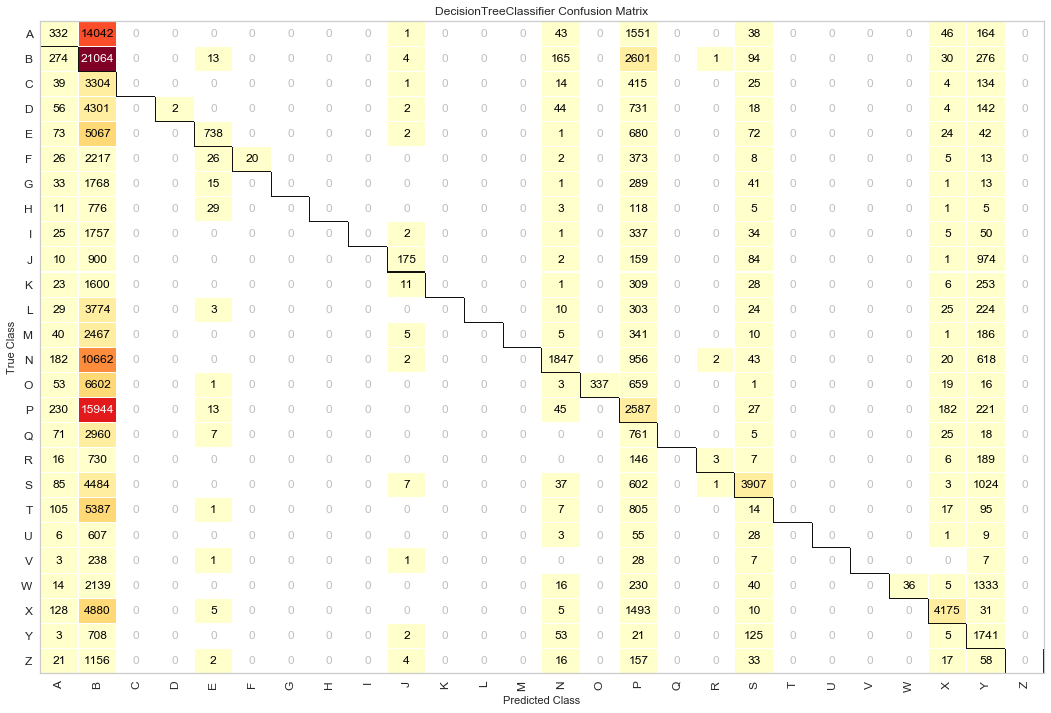

In [7]:
from yellowbrick.classifier import ConfusionMatrix
fig, ax = plt.subplots(figsize=(18,12)) #Making the final out put a bit more readable than the standard
cm = ConfusionMatrix(clf_DT, ax=ax) #This instance takes in an axes to add to a exisiting figure.

cm.score(X_test_post, y_test_post)

# How did we do?
cm.poof()

In [11]:
start_time = time.time()

clf_DT.fit(X_train_full, y_train_full)
print("--- %s seconds ---" % (time.time() - start_time))

--- 192.72250962257385 seconds ---


In [12]:
y_hat_full = clf_DT.predict(X_test_full)

In [13]:
acc = accuracy_score(y_test_full,y_hat_full) * 100
print("Accuracy is :{0}".format(acc))

Accuracy is :23.59217802219657


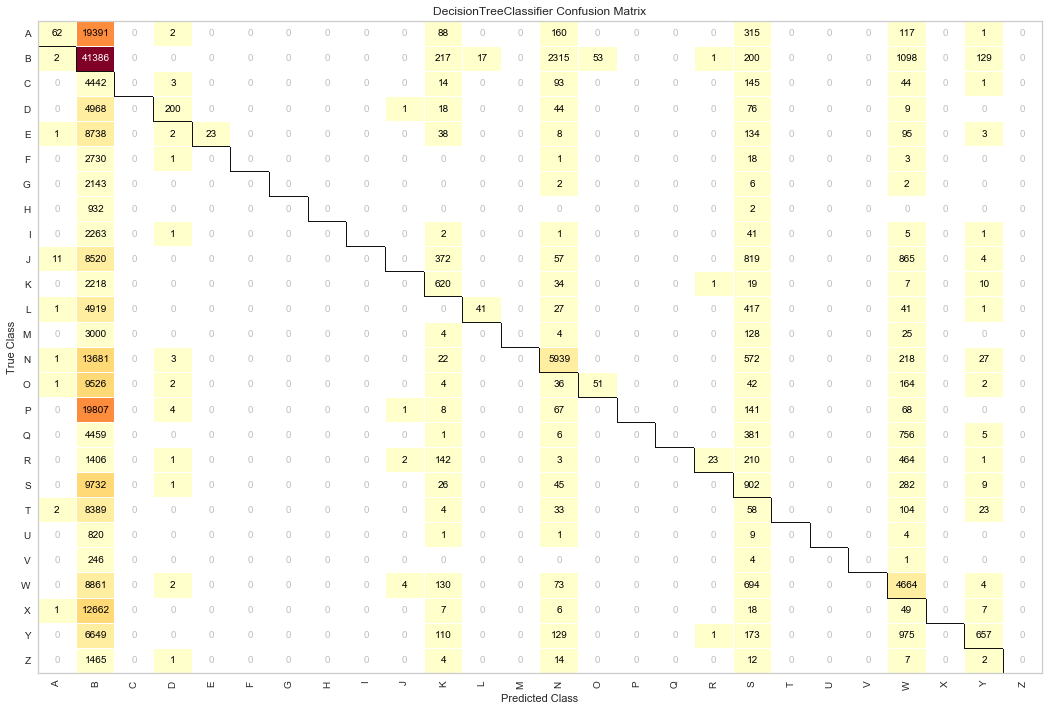

In [14]:
from yellowbrick.classifier import ConfusionMatrix
fig, ax = plt.subplots(figsize=(18,12)) #Making the final out put a bit more readable than the standard
cm = ConfusionMatrix(clf_DT, ax=ax) #This instance takes in an axes to add to a exisiting figure.

cm.score(X_test_full, y_test_full)

# How did we do?
cm.poof()

With both sets of data, there are similar classes that were heavily chosen over others [B, N, S, Y]. Both sets also placed a lot of information into category B, which is to be expected since it is out largest class at almost 20% of the data.

Now lets run some models that can account for imbalanced classes.

In [5]:
forest_post = RandomForestClassifier(n_estimators=100, max_depth= 10, max_features='auto',min_samples_split=1000)

In [6]:
start_time = time.time()

forest_post.fit(X_train_post, y_train_post)
print("--- %s seconds ---" % (time.time() - start_time))

NameError: name 'X_train_post' is not defined

In [19]:
acc = forest_post.score(X_train_post, y_train_post) * 100
print("Accuracy is :{0}".format(acc))

Accuracy is :31.266065020519235


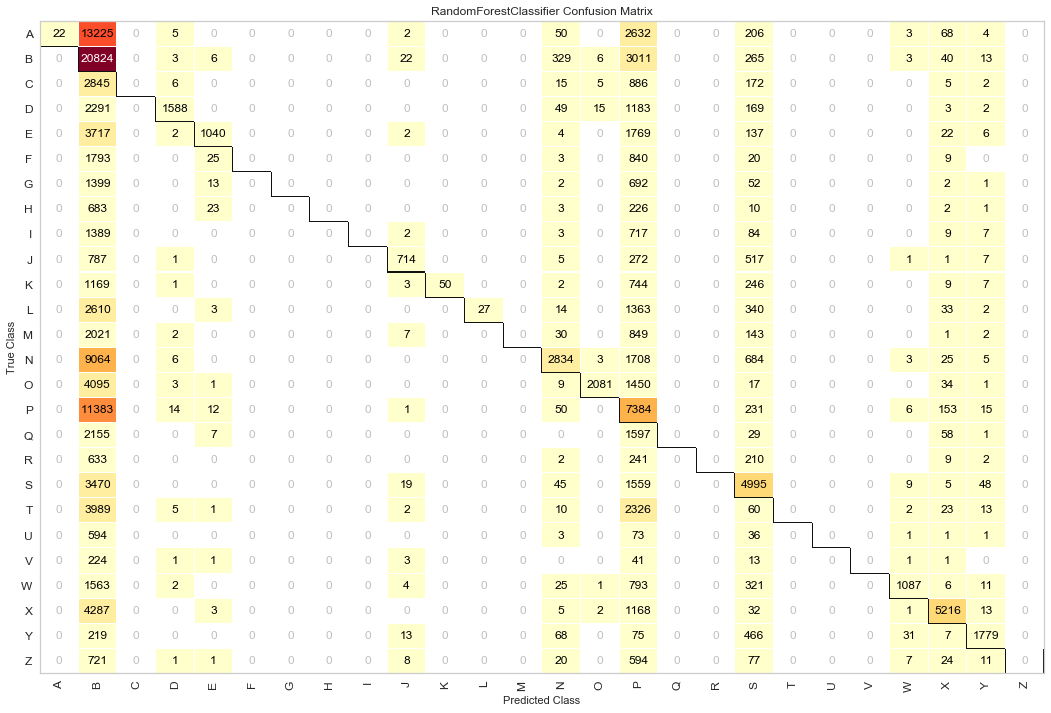

In [20]:
fig, ax = plt.subplots(figsize=(18,12)) #Making the final out put a bit more readable than the standard
cm = ConfusionMatrix(forest_post, ax=ax) #This instance takes in an axes to add to a exisiting figure.

cm.score(X_test_post, y_test_post)

# How did we do?
cm.poof()

In [7]:
forest_full = RandomForestClassifier(n_estimators=100, max_depth= 10, max_features='auto',min_samples_split=1000)

start_time = time.time()

forest_full.fit(X_train_full, y_train_full)
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\J\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


--- 2661.18941283226 seconds ---


In [8]:
acc = forest_full.score(X_train_full, y_train_full) * 100
print("Accuracy is :{0}".format(acc))

Accuracy is :33.10577548730741


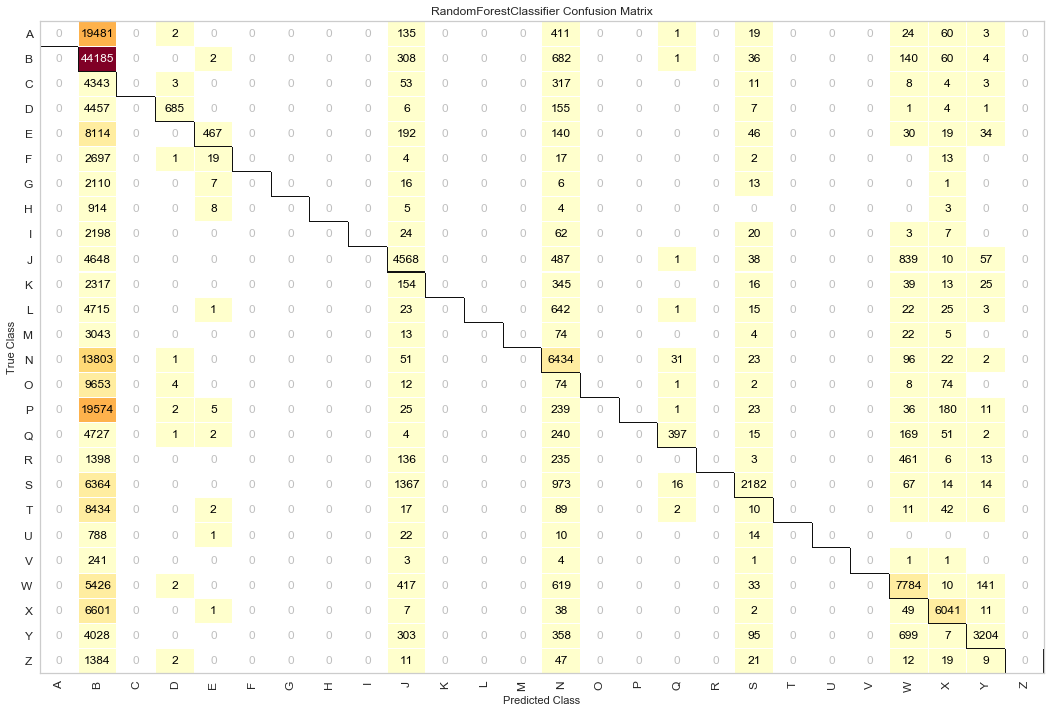

In [11]:
fig, ax = plt.subplots(figsize=(18,12)) #Making the final out put a bit more readable than the standard
cm = ConfusionMatrix(forest_full, ax=ax) #This instance takes in an axes to add to a exisiting figure.

cm.score(X_test_full, y_test_full)

# How did we do?
cm.poof()

As a baseline, the accuracy of my model increased by 7%. Lets run XGBoost and see if it does any better. I will then perform GridSearchCV on the model with the highest baseline accuracy.

---
## MODELS 

XGB<a id="XGB"></a>  
[TOP](#TOP)

In [4]:
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : 6,
    'objective' : 'multi:softmax'
    'num_class' : 26
}


clf_XGB_full = xgb.XGBClassifier()
clf_XGB_post = xgb.XGBClassifier()

In [5]:
start_time = time.time()

clf_XGB_post.fit(X_train_post, y_train_post)
print("This process: %s seconds ---" % (time.time() - start_time))

/home/socjon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/socjon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MemoryError: 

In [ ]:
start_time = time.time()

clf_XGB_full.fit(X_train_full, y_train_full)
print("Whole process: %s seconds ---" % (time.time() - start_time))

In [ ]:
y_hat_full = clf_XGB_full.predict(X_train_full)
val_preds = clf_XGB_full.predict(X_test_full)
training_accuracy = accuracy_score(y_train_full, y_hat_full)
val_accuracy = accuracy_score(y_test_post, val_preds)

print("Whole process: %s seconds ---" % (time.time() - start_time))
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))